Implement the method of power iteration to approximate the top 10 PCs from HapMap3 data (see Galinsky et al. 2016a Am J Hum Genet). 


In cases of subtle structure (e.g. 2 populations with low Fst, or a single admixed population), investigate how accuracy of inferred ancestry varies with (a) number of SNPs used, (b) number of samples used, (c) whether or not other populations not relevant to the subtle structure are included in the data set. Discuss. 

*********
First part:
Include all ancestries?
Include all individuals? # does population size matter?
Include all 23 chromosomes?

#rare variants

How large is the data if we use all 23 chromosomes? Should we aim to use SNPs all 23 chromosomes for better accuracy?

(a) how do we assess the accuracy of inferred ancestry? How do we determine the inferred ancestry from PCs? clusters?
(c) other populations not relevant to the subtle structure <- does this mean a population that is very distant to the admixed population?


1. data pre-processing (data selection 1. standardize in some way? large/small population 2. which chromosome (based on number of SNPs) 3. how to handle rare/non-rare SNPs)
2. measures after method (accuracy?)
3. clarification on (c) distant to subtle structure. 


In [1]:
import numpy as np

In [2]:
import sys
#update the path to include the hw_data directory
path = "/Users/tinaryu/stat_gen/hw_data"

sys.path.append(path) 
#sys.path is a list of directories that Python searches when you use import statement
#append then adds the hw_data to the directories to be searched
from CB_02704 import *

In [3]:
from PowerIteration_Functions import *

Question: Does performance improve with increased sample size?

In [4]:
CEU = read_geno_pop_chr('CEU',2) #northern European, USA
YRI = read_geno_pop_chr('YRI',2) ##Yoruba, Nigeria
CHB = read_geno_pop_chr('CHB',2) #Chinese, China

In [5]:
def GetCombinedGenoCEU_YRI_CHB(CEU, YRI, CHB, n):
    # Slice the first n columns of each array
    CEU_subset = CEU[:, :n]
    YRI_subset = YRI[:, :n]
    CHB_subset = CHB[:, :n]

    # Horizontally stack the sliced arrays
    combined = np.ma.hstack([CEU_subset, YRI_subset, CHB_subset])
    return combined


In [6]:
np.random.seed(42)


In [7]:
import matplotlib.pyplot as plt
def GetPCandPlot_CEUYRICHB(n):

    combined = GetCombinedGenoCEU_YRI_CHB(CEU, YRI, CHB, n)
    top10PCs = RunPowerIteration10PCs(combined)

    DistanceRatio = GetDistanceRatio(top10PCs, 3, n)
    # Define indices for each population
    ceu_indices = range(0, n)
    yri_indices = range(n, 2*n)
    chb_indices = range(2*n, 3*n)
    # Plot each population with a different color
    plt.figure(figsize=(6, 5))

    # CEU Population
    plt.scatter(top10PCs[0][ceu_indices], top10PCs[1][ceu_indices], c='blue', label='CEU', edgecolor='k')
    # YRI Population
    plt.scatter(top10PCs[0][yri_indices], top10PCs[1][yri_indices], c='green', label='YRI', edgecolor='k')
    # CHB Population
    plt.scatter(top10PCs[0][chb_indices], top10PCs[1][chb_indices], c='red', label='CHB', edgecolor='k')

    # Add labels and title
    plt.title("PCA Plot between top PCs of CEU, CHB, and YRI samples (n = " + str(n) + ")")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()
    return DistanceRatio
    

Power iteration: converged at iter=42
Power iteration: converged at iter=1
Power iteration: converged at iter=377
Power iteration: converged at iter=202
Power iteration: converged at iter=654
Power iteration: converged at iter=2
Power iteration: converged at iter=1048
Power iteration: converged at iter=884
Power iteration: converged at iter=1
Power iteration: converged at iter=3734


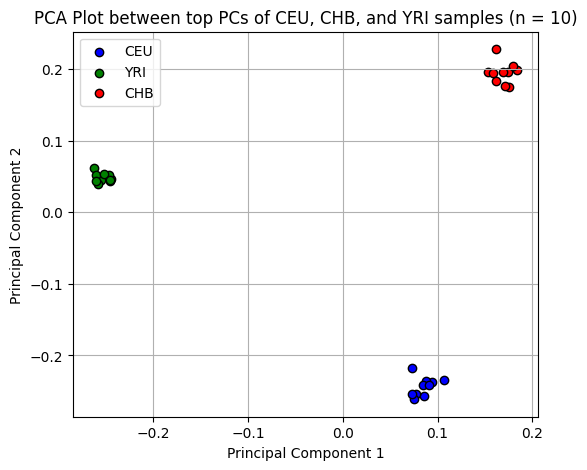

Power iteration: converged at iter=23
Power iteration: converged at iter=1
Power iteration: converged at iter=868
Power iteration: converged at iter=1403
Power iteration: converged at iter=2
Power iteration: converged at iter=314
Power iteration: converged at iter=1210
Power iteration: converged at iter=1
Power iteration: converged at iter=411
Power iteration: converged at iter=1405


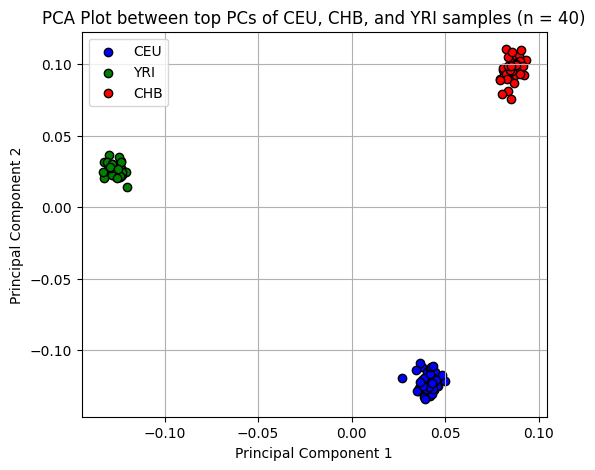

Power iteration: converged at iter=27
Power iteration: converged at iter=1
Power iteration: converged at iter=968
Power iteration: converged at iter=1
Power iteration: converged at iter=575
Power iteration: converged at iter=294
Power iteration: converged at iter=4229
Power iteration: converged at iter=1
Power iteration: converged at iter=1968
Power iteration: converged at iter=1


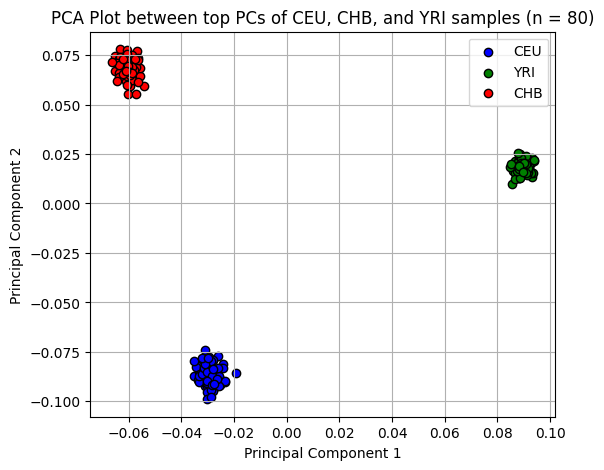

In [8]:
ns = [10,40,80]
distances = {}
for n in ns:
    DistanceRatio = GetPCandPlot_CEUYRICHB(n)
    distances[n] = DistanceRatio

In [9]:
df = pd.DataFrame(distances).T
df.columns = ['CEU', 'YRI', 'CHB']
df['mean'] = df.mean(axis=1)
df

,CEU,YRI,CHB,mean
10,31.382883,51.756343,29.828553,37.655926
40,33.109597,46.019561,30.853189,36.660782
80,30.411448,46.114156,34.538259,37.021287
